In [20]:
import rasterio
import geopandas as gpd
from rasterio.mask import mask
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np
path_to_shape = "./data/landcover/dz/dza_gc_adg.shp"
path_to_tif = "./data/climate/tmax/wc2.1_cruts4.09_2.5m_tmax_2020-12.tif"


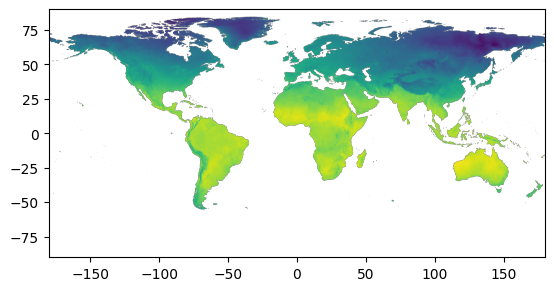

In [ ]:
# Open a GeoTIFF
with rasterio.open("./data/climate/tmax/wc2.1_cruts4.09_2.5m_tmax_2020-12.tif") as src:
    show(src)
# show(create_mask(path_to_shape, path_to_tif))

In [ ]:

def debug_clip(tif_path, shapefile_path):
    shapefile = gpd.read_file(shapefile_path)
    with rasterio.open(tif_path) as src:
       

        # Reproject shapefile if needed
        if shapefile.crs != src.crs:
            shapefile = shapefile.to_crs(src.crs)
            

        geoms = shapefile.geometry.values
        out_image, out_transform = mask(src, geoms, crop=True)
        out_image = out_image.astype(float)
        out_image[out_image == src.nodata] = np.nan  # mask nodata

        print("Clipped shape:", out_image.shape)
        print("Unique values (sample):", np.unique(out_image[~np.isnan(out_image)])[:10])

    plt.figure(figsize=(8, 8))
    plt.imshow(out_image[0], cmap="terrain")
    shapefile.boundary.plot(ax=plt.gca(), color="red")
    plt.show()


Raster CRS: EPSG:4326
Shapefile CRS: EPSG:4326
Raster bounds: BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
Shapefile bounds: [-8.67386723 18.96002769 11.97954845 37.09373474]
Clipped shape: (1, 436, 497)
Unique values (sample): [ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


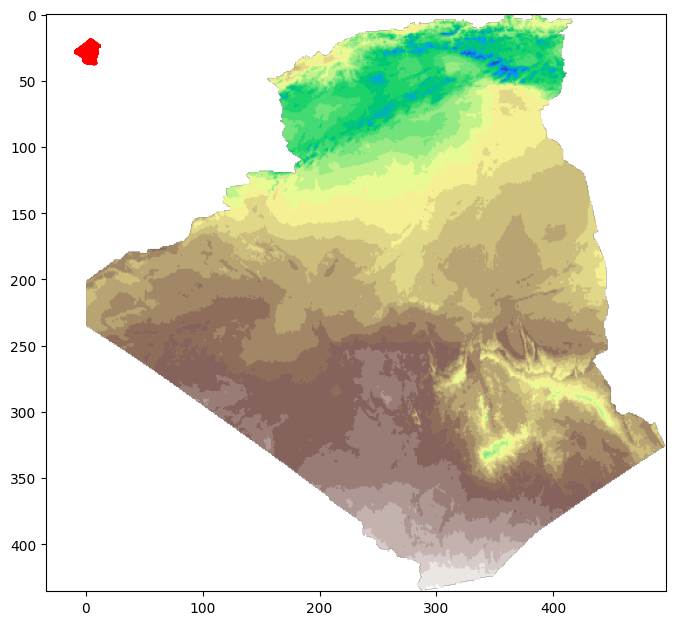

In [22]:
debug_clip(path_to_tif, path_to_shape)


Raster CRS: EPSG:4326
Shapefile CRS: EPSG:4326
Raster bounds: BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
Shapefile bounds: [ 7.53007603 30.23681069 11.59825888 37.55986   ]
Clipped shape: (1, 177, 99)
Unique values (sample): [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]


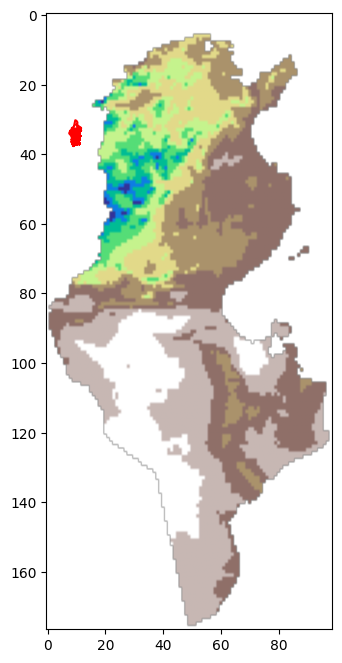

In [42]:
# tunisia_shp = gpd.read_file("./data/shapefiles/gadm41_TUN_.shp")

debug_clip(path_to_tif, "./data/shapefiles/gadm41_TUN_2.shp")
